In [7]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 91% 79.0M/86.8M [00:00<00:00, 131MB/s] 
100% 86.8M/86.8M [00:00<00:00, 106MB/s]


In [8]:
# unzip the file 
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-classification-mri.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
!ls

brain-tumor-classification-mri.zip  kaggle.json  sample_data  Testing  Training


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [11]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np 

append data in x and y variable 

In [12]:
x = []
y = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
  folder_path = os.path.join('/content/Training/',i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path,j))
    img = cv2.resize(img,(image_size,image_size))
    x.append(img)
    y.append(i)


for i in labels:
  folder_path = os.path.join('/content/Testing/',i)
  for j in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path,j))
    img = cv2.resize(img,(image_size,image_size))
    x.append(img)
    y.append(i)


x_train = np.array(x)
y_train = np.array(y)

In [13]:
x_train,y_train = shuffle(x_train,y_train,random_state = 101)
x_train.shape

(3264, 150, 150, 3)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.1,random_state =101)

In [15]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
# build the model 
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [17]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['acc'])

In [18]:
history = model.fit(x_train,y_train,epochs = 20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 25s 127ms/step - loss: 1.8051 - acc: 0.2985 - val_loss: 1.3640 - val_acc: 0.2789
Epoch 2/20
83/83 [==============================] - 8s 98ms/step - loss: 1.2746 - acc: 0.4113 - val_loss: 1.2424 - val_acc: 0.4694
Epoch 3/20
83/83 [==============================] - 8s 98ms/step - loss: 1.0355 - acc: 0.5543 - val_loss: 1.0435 - val_acc: 0.5510
Epoch 4/20
83/83 [==============================] - 8s 99ms/step - loss: 0.8842 - acc: 0.6095 - val_loss: 0.8596 - val_acc: 0.6293
Epoch 5/20
83/83 [==============================] - 8s 100ms/step - loss: 0.7622 - acc: 0.6795 - val_loss: 0.7372 - val_acc: 0.6735
Epoch 6/20
83/83 [==============================] - 8s 99ms/step - loss: 0.6412 - acc: 0.7317 - val_loss: 0.5897 - val_acc: 0.7551
Epoch 7/20
83/83 [==============================] - 8s 100ms/step - loss: 0.5809 - acc: 0.7613 - val_loss: 0.8231 - val_acc: 0.6667
Epoch 8/20
83/83 [==============================] - 8s 99ms/step - loss: 0.4980

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

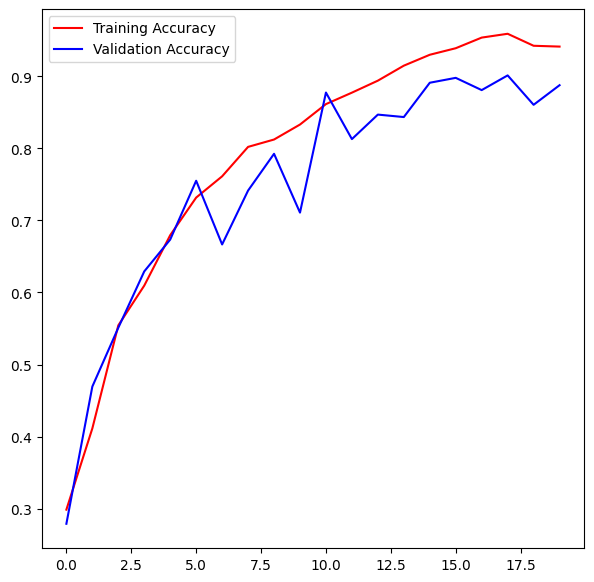

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))
fig = plt.figure(figsize=(7,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

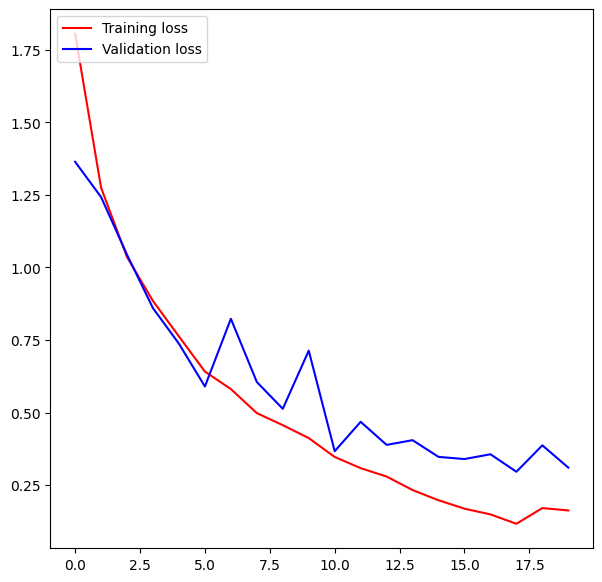

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(7,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [22]:
from google.colab.patches import cv2_imshow


Give the image path :/content/Testing/pituitary_tumor/image(11).jpg


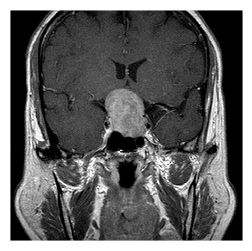

1/1 [==============================] - 0s 34ms/step
pituitary_tumor


In [35]:
input_image_path = input("Give the image path :")
img = cv2.imread(input_image_path)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

from tensorflow.keras.preprocessing import image
plt.figure(figsize=(4,3))
img = image.load_img(input_image_path)
plt.imshow(img,interpolation='nearest')
plt.axis('off')
plt.show()

a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

In [36]:
model.save('/content/drive/MyDrive/save model/brain_tumor_detection_using_cnn.h5')